In [1]:
import sys
import json
import pandas as pd
import numpy as np
import itertools
import glob, os
from biom.table import Table

sys.path.append('../')

from src.etl import *
from src.eda import *
from src.graph import *
from src.sparsify import *

In [2]:
# t2d config
disease = 't2d'
otu_table_fp = '../data/t2d/otu_table.csv'
metadata_fp = '../data/t2d/metadata.csv'
rare_otu_threshold = 1
transformation = 'norm'
disease_col = 'IRIS'

In [3]:
otu_table = pd.read_csv(otu_table_fp, index_col=0)
filtered_otu_table = filter_rare_otus(otu_table, rare_otu_threshold)
metadata = pd.read_csv(metadata_fp, index_col=0)

merged = pd.concat([metadata, filtered_otu_table], axis=1)
healthy = merged[merged[disease_col] == 0] #.drop(columns=[disease_col])
diseased = merged[merged[disease_col] == 1] #.drop(columns=[disease_col])

In [4]:
# T2D microbe-outcome
data_loglasso = prune_lasso(merged, metadata, f'../data/{disease}/lasso_covariates_{transformation}.txt')
print(data_loglasso.shape)
t2d_causal_graph = run_cdnod(data_loglasso, disease, f'/{disease}/cdnod_{transformation}')

The pruned dataset has the following dimensions:  (331, 27)
(331, 27)


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

The following genera are directly linked to the 'IRIS' node: 
 genus_Butyricimonas
genus_Clostridium.XlVb
genus_Odoribacter
genus_unclassified_Bacteria
genus_unclassified_Firmicutes
The following genera are directly linked to the 'Gender' node: 
 genus_Erysipelotrichaceae_incertae_sedis
The following genera are directly linked to the 'Ethnicity' node: 
 genus_Butyricicoccus
genus_Coprococcus
genus_Erysipelotrichaceae_incertae_sedis
genus_unclassified_Bacteria


In [14]:
adj_mat = t2d_causal_graph.graph
adj_mat

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],


(<matplotlib.image.AxesImage at 0x15c2b9fd0>,
 <matplotlib.colorbar.Colorbar at 0x15bffe6a0>)

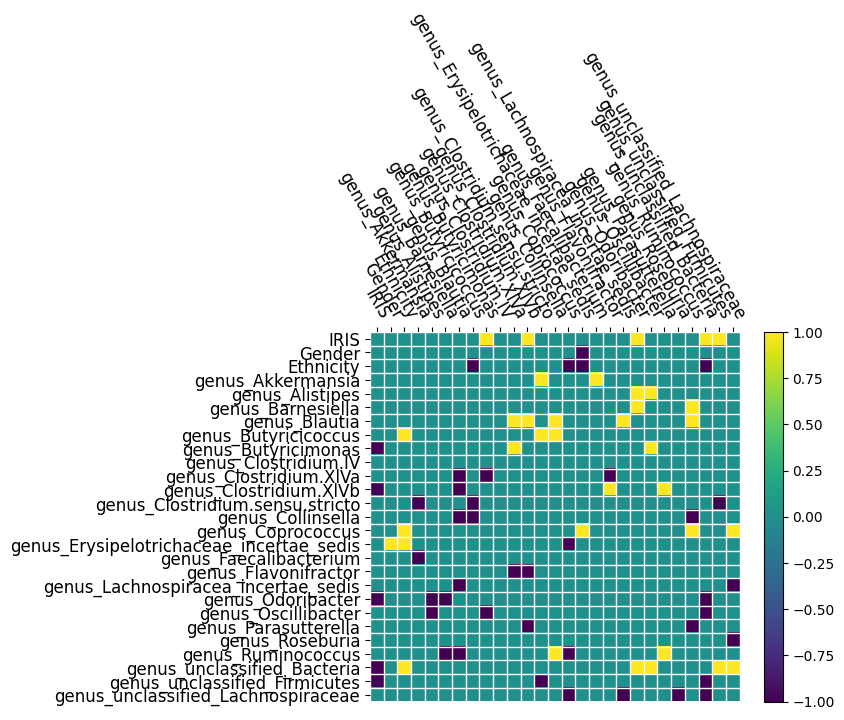

In [12]:
heatmap(t2d_causal_graph.graph, list(data_loglasso.columns), list(data_loglasso.columns))